In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from citipy import citipy
import openweathermapy.core as owm

from api_keys import api_key
settings = {"units": "imperial", "appid": api_key}

output_data_file = "output_data/cities.csv"

lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city_data = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
    # If the city is unique, then add it to a our cities list
    if city_data not in cities:
        cities.append(city_data)

# Print the city count to confirm sufficient count
len(cities)

601

In [3]:
weather_data = []

print("Beginning Data Retrieval")
print("---------------------------------")
counter = 1
set_counter = 1 
for city in cities:
    try:
        data = owm.get_current("{},{}".format(city.city_name, city.country_code), **settings)
        Cityname = city.city_name
        Cloudiness = data['clouds']['all']
        Country = data['sys']['country']
        Date = data['dt']
        Humidity = data['main']['humidity']
        Lat = data['coord']['lat']
        Lng = data['coord']['lon']
        Max_Temp = data['main']['temp_max']
        Wind_Speed = data['wind']['speed']
        if counter <= 50:
            print("Processing Record {} of Set {} | {}".format(counter, set_counter, Cityname))
            counter += 1
        else:
            counter = 1
            set_counter += 1 
            print("Processing Record {} of Set {} | {}".format(counter, set_counter, Cityname))
        weather_data.append({'City': Cityname, 'Cloudiness': Cloudiness, 'Country': Country, "Date": Date, "Humidity": Humidity, "Lat": Lat, "Lng": Lng, "Max Temp": Max_Temp, "Wind Speed": Wind_Speed})
    except:
        print("City not found. Skipping...")
print("------------------------------")
print("Data Retrieval Complete")
print("------------------------------")
    
#    
    

Beginning Data Retrieval
---------------------------------
Processing Record 1 of Set 1 | appleton
Processing Record 2 of Set 1 | wernigerode
Processing Record 3 of Set 1 | vila franca do campo
Processing Record 4 of Set 1 | rikitea
City not found. Skipping...
Processing Record 5 of Set 1 | ola
Processing Record 6 of Set 1 | asasa
Processing Record 7 of Set 1 | sao joao da barra
Processing Record 8 of Set 1 | mazagao
Processing Record 9 of Set 1 | ushuaia
Processing Record 10 of Set 1 | georgetown
Processing Record 11 of Set 1 | agirish
Processing Record 12 of Set 1 | saskylakh
Processing Record 13 of Set 1 | tilichiki
Processing Record 14 of Set 1 | hermanus
Processing Record 15 of Set 1 | roald
City not found. Skipping...
Processing Record 16 of Set 1 | clyde river
Processing Record 17 of Set 1 | azangaro
Processing Record 18 of Set 1 | new norfolk
Processing Record 19 of Set 1 | khatanga
Processing Record 20 of Set 1 | klaksvik
Processing Record 21 of Set 1 | chimbote
Processing Rec

Processing Record 31 of Set 4 | waipawa
Processing Record 32 of Set 4 | neryungri
Processing Record 33 of Set 4 | mayya
Processing Record 34 of Set 4 | severo-kurilsk
Processing Record 35 of Set 4 | placerville
City not found. Skipping...
Processing Record 36 of Set 4 | varberg
Processing Record 37 of Set 4 | hobyo
Processing Record 38 of Set 4 | mindelo
Processing Record 39 of Set 4 | zhigansk
Processing Record 40 of Set 4 | misratah
Processing Record 41 of Set 4 | hovd
City not found. Skipping...
Processing Record 42 of Set 4 | cockburn town
Processing Record 43 of Set 4 | bathsheba
Processing Record 44 of Set 4 | marovoay
City not found. Skipping...
Processing Record 45 of Set 4 | torbay
Processing Record 46 of Set 4 | klyuchi
Processing Record 47 of Set 4 | lompoc
Processing Record 48 of Set 4 | mandalgovi
Processing Record 49 of Set 4 | ponta do sol
Processing Record 50 of Set 4 | luderitz
Processing Record 1 of Set 5 | erzin
Processing Record 1 of Set 5 | comodoro rivadavia
Proce

Processing Record 6 of Set 8 | hualmay
Processing Record 7 of Set 8 | novyy urengoy
City not found. Skipping...
Processing Record 8 of Set 8 | namibe
Processing Record 9 of Set 8 | mount gambier
Processing Record 10 of Set 8 | naze
Processing Record 11 of Set 8 | natal
Processing Record 12 of Set 8 | norwich
Processing Record 13 of Set 8 | jamai
Processing Record 14 of Set 8 | zhanaozen
Processing Record 15 of Set 8 | grindavik
Processing Record 16 of Set 8 | kadoma
Processing Record 17 of Set 8 | diu
Processing Record 18 of Set 8 | johnstown
Processing Record 19 of Set 8 | jumla
Processing Record 20 of Set 8 | oktyabrskiy
Processing Record 21 of Set 8 | sioux lookout
Processing Record 22 of Set 8 | vorozhba
Processing Record 23 of Set 8 | dalvik
Processing Record 24 of Set 8 | maturin
Processing Record 25 of Set 8 | singapore
Processing Record 26 of Set 8 | shingu
Processing Record 27 of Set 8 | zhicheng
Processing Record 28 of Set 8 | banyo
City not found. Skipping...
Processing Reco

In [4]:
pd.DataFrame(weather_data).count()

City          524
Cloudiness    524
Country       524
Date          524
Humidity      524
Lat           524
Lng           524
Max Temp      524
Wind Speed    524
dtype: int64

In [5]:
City_weather_df = pd.DataFrame(weather_data)
City_weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,appleton,90,US,1552482786,100,44.26,-88.41,37.40,6.93
1,wernigerode,75,DE,1552482809,57,51.83,10.79,48.99,20.80
2,vila franca do campo,75,PT,1552482632,62,37.72,-25.43,59.00,11.41
3,rikitea,92,PF,1552482817,100,-23.12,-134.97,72.99,14.81
4,ola,0,RU,1552482817,100,59.58,151.30,7.47,2.17


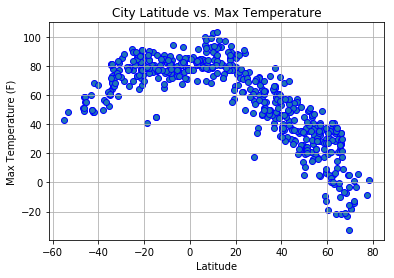

In [6]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Max Temp'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Max Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
plt.show()

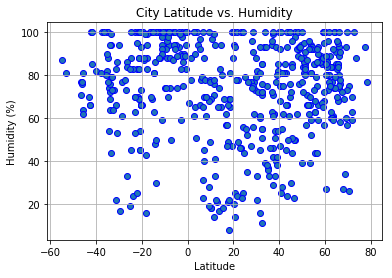

In [7]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Humidity'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
plt.show()

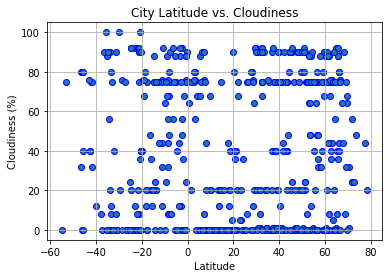

In [8]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Cloudiness'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
plt.show()

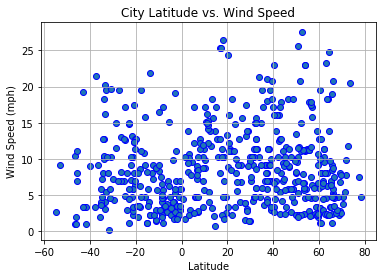

In [11]:
plt.scatter(City_weather_df['Lat'], City_weather_df['Wind Speed'], marker='o', edgecolors= 'b')
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
plt.show()

In [17]:
# data

In [16]:
# City_weather_df['Wind Speed'].value_counts()